In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [2]:
from dateutil import parser

In [3]:
import salem

In [4]:
from subprocess import call

In [5]:
# url = "ftp://ftp.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171210_for_20171224to20180325.nc"

In [6]:
url = "ftp://ftp.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171126_for_20171210to20180325.nc"

In [7]:
dates = url.split('_')[-1].split(".")[-2].split("to")

In [8]:
dates

['20171210', '20180325']

In [9]:
dates = list(map(parser.parse, dates))

In [10]:
dates_range = pd.date_range(start=dates[0], freq='7d', periods=12)

In [11]:
dates_range

DatetimeIndex(['2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31',
               '2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],
              dtype='datetime64[ns]', freq='7D')

In [12]:
opath = "/Volumes/GDATA/data/CRW/outlook/"

In [13]:
filename = url.split("/")[-1]

In [14]:
filename

'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171126_for_20171210to20180325.nc'

In [15]:
download = False

In [16]:
if download:
    cmd = "curl --silent {} -o {}/{}".format(url, opath, filename)
    r = call(cmd, shell=True)

In [17]:
dset = xr.open_dataset(os.path.join(opath, filename))

In [18]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720, time: 1)
Coordinates:
  * time               (time) datetime64[ns] 2017-12-03T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (time, lat, lon) float64 ...
    CRW_BAA_Week_01    (time, lat, lon) float64 ...
    CRW_BAA_Week_02    (time, lat, lon) float64 ...
    CRW_BAA_Week_03    (time, lat, lon) float64 ...
    CRW_BAA_Week_04    (time, lat, lon) float64 ...
    CRW_BAA_Week_05    (time, lat, lon) float64 ...
    CRW_BAA_Week_06    (time, lat, lon) float64 ...
    CRW_BAA_Week_07    (time, lat, lon) float64 ...
    CRW_BAA_Week_08    (time, lat, lon) float64 ...
    CRW_BAA_Week_09    (time, lat, lon) float64 ...
    CRW_BAA_Week_10    (time, lat, lon) float64 ...
    CRW_BAA_Week_11    (time, lat, lon) float64 ...
    CRW_BAA

In [19]:
dset = dset.squeeze()

In [20]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720)
Coordinates:
    time               datetime64[ns] 2017-12-03T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (lat, lon) float64 ...
    CRW_BAA_Week_01    (lat, lon) float64 ...
    CRW_BAA_Week_02    (lat, lon) float64 ...
    CRW_BAA_Week_03    (lat, lon) float64 ...
    CRW_BAA_Week_04    (lat, lon) float64 ...
    CRW_BAA_Week_05    (lat, lon) float64 ...
    CRW_BAA_Week_06    (lat, lon) float64 ...
    CRW_BAA_Week_07    (lat, lon) float64 ...
    CRW_BAA_Week_08    (lat, lon) float64 ...
    CRW_BAA_Week_09    (lat, lon) float64 ...
    CRW_BAA_Week_10    (lat, lon) float64 ...
    CRW_BAA_Week_11    (lat, lon) float64 ...
    CRW_BAA_Week_12    (lat, lon) float64 ...
    CRW_BAA_Week_13    (lat, lon) float64 ...
    CRW

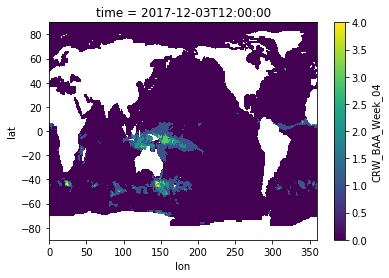

In [21]:
dset['CRW_BAA_Week_04'].plot()

In [22]:
dset = dset.sel(lon=slice(100, 300), lat=slice(50, -50))

In [23]:
variables = ["CRW_BAA_Week_{:02d}".format(x) for x in range(2, 14)]

In [24]:
variables

['CRW_BAA_Week_02',
 'CRW_BAA_Week_03',
 'CRW_BAA_Week_04',
 'CRW_BAA_Week_05',
 'CRW_BAA_Week_06',
 'CRW_BAA_Week_07',
 'CRW_BAA_Week_08',
 'CRW_BAA_Week_09',
 'CRW_BAA_Week_10',
 'CRW_BAA_Week_11',
 'CRW_BAA_Week_12',
 'CRW_BAA_Week_13']

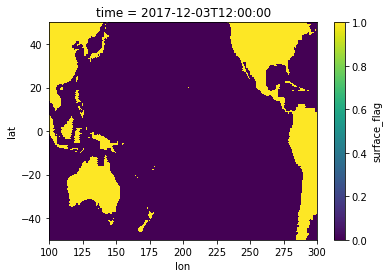

In [25]:
dset['surface_flag'].plot()

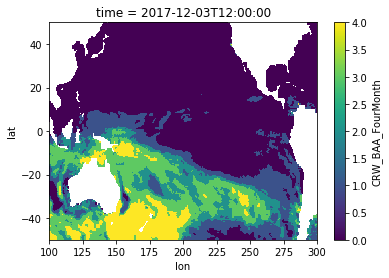

In [26]:
dset['CRW_BAA_FourMonth'].plot()

In [27]:
dset = dset[variables]

In [28]:
l = [] 
for v in variables: 
    d = dset[v]
    d.name = 'CRW_BAA'
    l.append(d)

In [29]:
dset = xr.concat(l, dim='time')

In [30]:
dset['time'] = (('time'), dates_range)

In [31]:
dset

<xarray.DataArray 'CRW_BAA' (time: 12, lat: 200, lon: 400)>
array([[[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  1.,   0., ...,   0.,   0.]],

       ..., 
       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]]])
Coordinates:
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * time     (time) datetime64[ns] 2017-12-10 2017-12-17 2017-12-24

In [34]:
from glob import glob

In [35]:
lfiles = glob("../shapefiles/shapes_*_converted.shp")

In [79]:
dates_e = []
df_dates = []
for t in range(len(dset.time)): 
    df_country = {}
    dset_w = dset.isel(time=t)
    dates_e.append(pd.to_datetime(dset_w.time.data))
    for f in lfiles:
        country_name = f.split('/')[-1].split(".")[-2].replace("shapes_","").replace("_converted","")
#         print("processing {}".format(country_name))
        sh_country = salem.read_shapefile(f)
        d_subset = dset_w.salem.subset(shape=sh_country, margin=2)
        d_subset_roi = d_subset.salem.roi(shape=sh_country) 
        d_subset_roi_stacked = d_subset_roi.stack(z=('lat','lon'))
        df = d_subset_roi_stacked.to_dataframe() 
        df = df.dropna()
        summary_df = df.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9])
        df_country[country_name] = int(summary_df.loc['90%',:][0])
#     df_dates.append(pd.DataFrame(df_country, index=["{:%Y-%m-%d}".format(pd.to_datetime(dset_w.time.data))]))
    df_dates.append(pd.DataFrame(df_country, index=[pd.to_datetime(dset_w.time.data)]))

In [80]:
df = pd.concat(df_dates, axis=0)

In [84]:
df

,American_Samoa,Austral_Islands,Federated_States_of_Micronesia,Fiji,Guam,Kiribati_Gilbert_Islands,Kiribati_Line_Islands,Kiribati_Phoenix_Islands,Marquesas,Marshall_Islands,...,Society_Islands,Solomon_Islands,Southern_Cook_Islands,Tokelau,Tonga,Tuamotu__Gambier_Islands,Tuvalu,Vanuatu_North,Vanuatu_South,Wallis_&_Futuna
2017-12-10,1,0,1,1,0,0,0,0,0,1,...,1,2,1,1,1,0,1,1,0,1
2017-12-17,1,0,1,1,0,0,0,0,0,1,...,1,3,1,1,1,0,1,1,0,1
2017-12-24,1,0,1,1,0,0,0,0,0,0,...,1,3,0,1,1,0,2,1,0,2
2017-12-31,1,0,1,2,0,0,0,0,0,0,...,0,3,0,1,1,0,2,1,0,2
2018-01-07,1,0,1,1,0,0,0,0,0,0,...,1,3,0,1,1,0,2,1,0,2
2018-01-14,1,0,0,2,0,1,0,0,0,0,...,1,4,0,1,1,0,2,1,0,2
2018-01-21,1,0,0,2,0,1,0,0,0,0,...,1,4,0,1,1,0,2,1,1,2
2018-01-28,1,1,0,2,0,1,0,0,0,0,...,1,4,1,1,1,1,2,2,1,2
2018-02-04,2,1,0,3,0,0,0,0,0,0,...,1,4,1,1,2,1,2,2,1,3
2018-02-11,2,1,0,3,0,0,0,0,0,0,...,1,4,1,1,2,1,3,3,1,3


In [90]:
df_max = df.groupby(df.index.month).max()

In [93]:
df_max = df_max.reindex([12,1,2])

In [96]:
df_max.T.to_csv('../outputs/CSFV2_outlook_monthly_90th_per_summary_table_from_20171210.csv')

In [99]:
df.T.to_csv('../outputs/CSFV2_outlook_weekly_90th_per_summary_table_from_20171210.csv')

In [101]:
df.columns

Index(['American_Samoa', 'Austral_Islands', 'Federated_States_of_Micronesia',
       'Fiji', 'Guam', 'Kiribati_Gilbert_Islands', 'Kiribati_Line_Islands',
       'Kiribati_Phoenix_Islands', 'Marquesas', 'Marshall_Islands', 'Nauru',
       'New_Caledonia', 'Niue', 'Northern_Cook_Islands', 'Northern_Marianas',
       'Palau', 'Papua_New_Guinea', 'Pitcairn_Islands', 'Samoa',
       'Society_Islands', 'Solomon_Islands', 'Southern_Cook_Islands',
       'Tokelau', 'Tonga', 'Tuamotu__Gambier_Islands', 'Tuvalu',
       'Vanuatu_North', 'Vanuatu_South', 'Wallis_&_Futuna'],
      dtype='object')

In [102]:
lnames = df.columns

In [103]:
lnames

Index(['American_Samoa', 'Austral_Islands', 'Federated_States_of_Micronesia',
       'Fiji', 'Guam', 'Kiribati_Gilbert_Islands', 'Kiribati_Line_Islands',
       'Kiribati_Phoenix_Islands', 'Marquesas', 'Marshall_Islands', 'Nauru',
       'New_Caledonia', 'Niue', 'Northern_Cook_Islands', 'Northern_Marianas',
       'Palau', 'Papua_New_Guinea', 'Pitcairn_Islands', 'Samoa',
       'Society_Islands', 'Solomon_Islands', 'Southern_Cook_Islands',
       'Tokelau', 'Tonga', 'Tuamotu__Gambier_Islands', 'Tuvalu',
       'Vanuatu_North', 'Vanuatu_South', 'Wallis_&_Futuna'],
      dtype='object')

In [ ]:
rnames = ['American Samoa',
          'Austral Islands',
          'Federates States of Micronesia',
          'Fiji','Guam','Kiribati (Gilbert Islands)',
          'Kiribati (Line Island)','Kiribati (Phoenix Islands)',
          'Marquesas',
         'Marshall Islands']